# **Salifort Motors project lab**

## Description and deliverables


# **PACE stages**


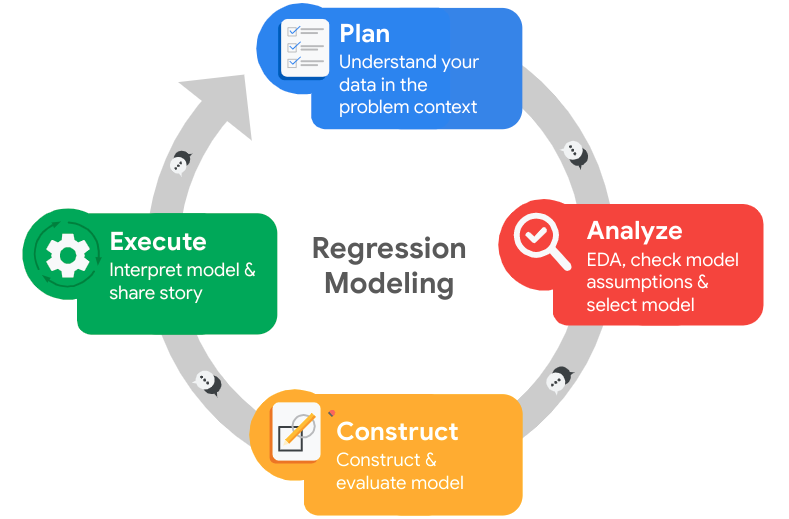

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.


The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
### YOUR CODE HERE ###
df0 = df0.rename({'Work_accident': 'work_accident', 'Department': 'department'}, axis = 1)

# Display all column names after the update
### YOUR CODE HERE ###
df0

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
### YOUR CODE HERE ###
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[df0.duplicated(keep = 'first')]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df = df0.drop_duplicates(keep = 'first')


# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


### Check outliers

Check for outliers in the data.

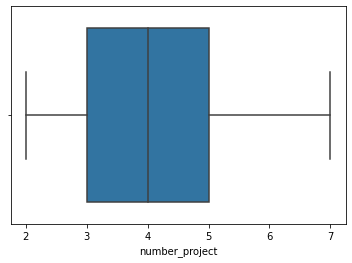

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###
sns.boxplot(df['number_project'])


# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




- there is no linear relationship between variables. maximum people leaving company are from sales department. having low income, score less during evaluation, people levaing are working for 3-7 hours.
- purpose of EDA is to underastand data, inter-relationships, reliability.
- documnetation of matplotlib, seaborn

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [12]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
df['left'].value_counts()

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
df['left'].value_counts(normalize = True)

0    0.833959
1    0.166041
Name: left, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [13]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [14]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

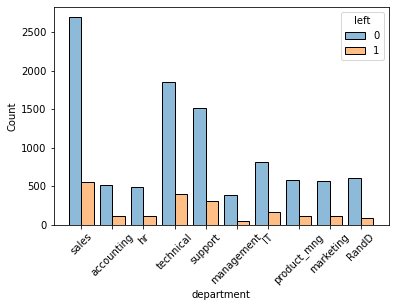

In [15]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(df, x="department", hue="left",discrete = True, multiple='dodge',alpha=0.5, shrink=0.8)
plt.xticks(rotation = 45)

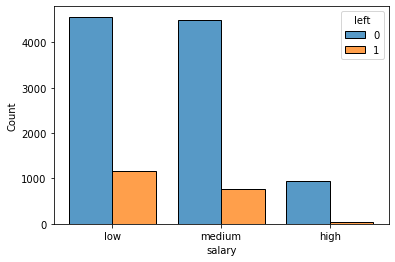

In [16]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(df, x="salary", hue="left", discrete = True, multiple='dodge', shrink=0.8)


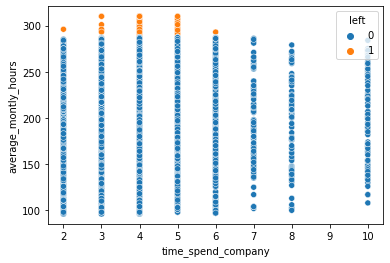

In [17]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.scatterplot(data = df, x = 'time_spend_company', y = 'average_montly_hours', hue = 'left')

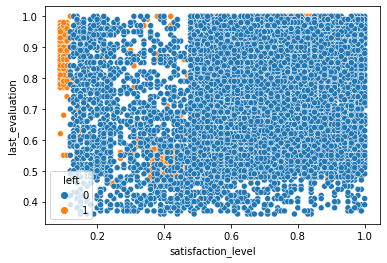

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.scatterplot(data = df, x = 'satisfaction_level', y = 'last_evaluation', hue = 'left')

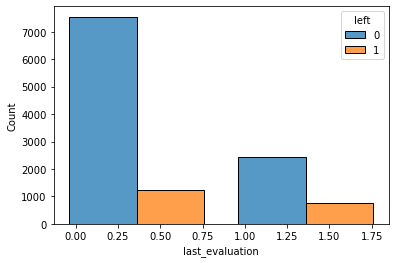

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(df, x="last_evaluation", hue="left", discrete = True, multiple='dodge', shrink=0.8)

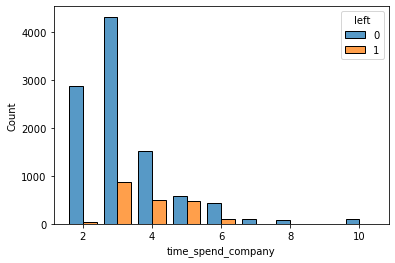

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(df, x="time_spend_company", hue="left", discrete = True, multiple='dodge', shrink=0.8)

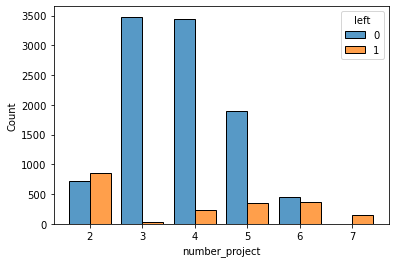

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(df, x="number_project", hue="left", discrete = True, multiple='dodge', shrink=0.8)

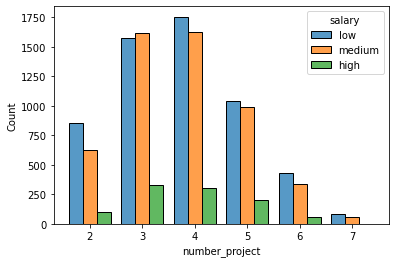

In [22]:
sns.histplot(df, x="number_project", hue="salary", discrete = True, multiple='dodge', shrink=0.8)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

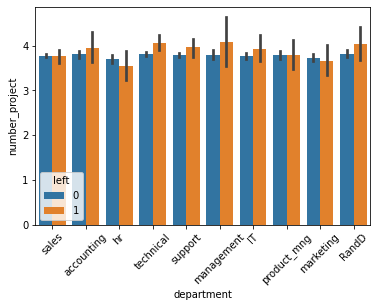

In [23]:
sns.barplot(data = df, x="department", y="number_project", hue = "left")
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

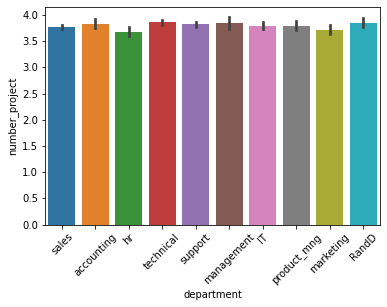

In [24]:
sns.barplot(data = df, x="department", y="number_project")
plt.xticks(rotation = 45)

### insight

- insights for people leaving company:
     - from sales, technical, support department
     - score less during evaluation
     - low salary
     - have completed 3-7 projects.
     - maximum people leaving have completed 2 projects.

### Feature Engineering

In [25]:
departments = {
    'sales': 1, 'accounting': 2, 'hr': 3, 'technical': 4, 'support': 5, 'management': 6,
       'IT': 7, 'product_mng': 8, 'marketing': 9, 'RandD': 10
}
df['department_code'] = df['department'].map(departments)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary,department_code
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high,6
11996,0.74,0.95,5,266,10,0,0,1,management,high,6
11997,0.85,0.54,3,185,10,0,0,1,management,high,6
11998,0.33,0.65,3,172,10,0,0,1,marketing,high,9


In [26]:
df = pd.get_dummies(df, columns = ['salary'])

In [27]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,department_code,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,1,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,1,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,1,0,1,0


In [28]:
df = df.drop(['department'], axis = 1)

In [29]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_code,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,1,0,1,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,1,0,1,0
4,0.37,0.52,2,159,3,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,6,1,0,0
11996,0.74,0.95,5,266,10,0,0,1,6,1,0,0
11997,0.85,0.54,3,185,10,0,0,1,6,1,0,0
11998,0.33,0.65,3,172,10,0,0,1,9,1,0,0


# paCe: Construct Stage

In [30]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department_code,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,1,0,1,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,1,0,1,0
4,0.37,0.52,2,159,3,0,1,0,1,0,1,0


In [31]:
x = df.copy()
x = x.drop(['left'], axis = 1)
y = df['left']

x_tr, x_test, y_tr, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 0)
x_train, x_val, y_train, y_val = train_test_split(x_tr, y_tr, test_size = 0.25, stratify = y_tr, random_state = 0)

In [32]:
rfc = RandomForestClassifier()

params_cv = {
    'max_depth': [2],
    'min_samples_split': [5],
    'min_samples_leaf': [6],
    'max_features': [3],
    'n_estimators': [10]
}
scoring = {'accuracy', 'precision', 'recall', 'f1'}

gr_cv = GridSearchCV(rfc, params_cv, scoring = scoring, cv = 5, refit = 'recall')

In [33]:
gr_cv.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [34]:
gr_cv.best_params_

{'max_depth': 2,
 'max_features': 3,
 'min_samples_leaf': 6,
 'min_samples_split': 5,
 'n_estimators': 10}

In [35]:
gr_cv.best_score_

0.4426778242677824

In [36]:
xgb = XGBClassifier()
params_cv = {
    'max_depth': [2],
    'max_leaves': [2],
    'learning_rate': [0.1, 0.001],
    'n_estimators': [20]
}
scoring = {'accuracy', 'precision', 'recall', 'f1'}
gs_cv2 = GridSearchCV(xgb, params_cv, scoring = scoring, cv = 5, refit = 'recall')

In [37]:
gs_cv2.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
                                     objective='binary:logistic',
                                     predictor=None, random_state=None,
                

# pacE: Execute Stage

In [38]:
def metrix_scores(model_name, y_pred, y_test):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    
    data = {
        'model_name': [model_name],
        'accuracy': [accuracy],
        'precision': [precision],
        'recall': [recall],
        'f1score': [f1score]
    }
    
    df = pd.DataFrame(data)
    return df

In [39]:
y_predrfc = gr_cv.predict(x_test)
rfc_res_metric = metrix_scores('Random Forest Classification', y_predrfc, y_test)

In [40]:
y_pred = gr_cv.best_estimator_.predict(x_test)
rfc_res = metrix_scores('Random Forest Classification Best Estimator', y_pred, y_test)

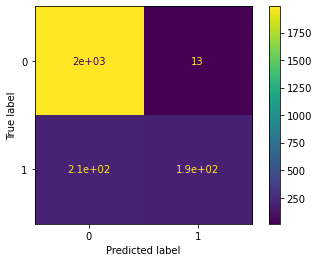

In [41]:
cm = confusion_matrix(y_test, y_pred, labels = gr_cv.best_estimator_.classes_)
ConfusionMatrixDisplay(cm, display_labels = gr_cv.best_estimator_.classes_).plot()
plt.show()

In [42]:
xgb_ypred = gs_cv2.predict(x_test)
xgb_score = metrix_scores('XGB Classifier', xgb_ypred, y_test)

In [43]:
xgb_ypred = gs_cv2.best_estimator_.predict(x_test)

In [44]:
xgb_scorebp = metrix_scores('XGB Classifier Best Estimator', xgb_ypred, y_test)

In [45]:
pd.concat([rfc_res, rfc_res_metric, xgb_score, xgb_scorebp])

,model_name,accuracy,precision,recall,f1score
0,Random Forest Classification Best Estimator,0.906211,0.934673,0.467337,0.623116
0,Random Forest Classification,0.906211,0.934673,0.467337,0.623116
0,XGB Classifier,0.922468,0.835443,0.663317,0.739496
0,XGB Classifier Best Estimator,0.922468,0.835443,0.663317,0.739496


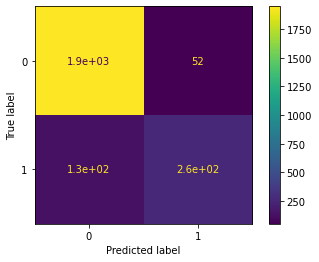

In [46]:
cm = confusion_matrix(y_test, xgb_ypred, labels = gs_cv2.best_estimator_.classes_)
ConfusionMatrixDisplay(cm, display_labels = gs_cv2.best_estimator_.classes_).plot()
plt.show()

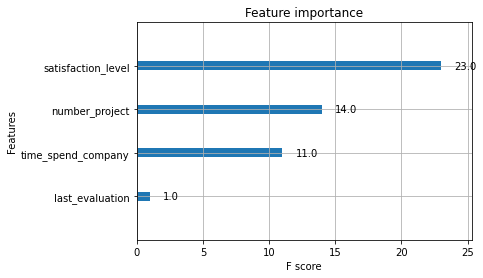

In [47]:
from xgboost import plot_importance
plot_importance(gs_cv2.best_estimator_)

✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






### Result and conclusions